utiles d'analyse pout TP MMC UGA 2025

lien ver les TP en format Markdown:

https://github.com/nbcongmingdan/TP-MMC-2025

Repo Public, please create a github account to copy and modify files. Thank you very much

# Tension superficielle



Essayer d'utiliser Python pour analyser automatiquement les données de mesure.

en fin, renouveaulez les constant pour le mesure differents

### Constants & Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression


from scipy.optimize import curve_fit

# Définition des constantes
g = 9.81  # accélération gravitationnelle (m/s²)
rho_water = 998.0  # densité de l'eau (kg/m³), température supposée 20°C
rho_alchool = 789.0  # densité de l'alcool (kg/m³), supposé éthanol

tension_superficielle_eau = 0.0728  # tension superficielle de l'eau (N/m)
tension_superficielle_alcool = 0.022  # tension superficielle de l'alcool (N/m)

viscosite_cinematique_eau = 1.0e-6  # viscosité cinématique de l'eau (m²/s)
viscosite_cinematique_alcool = 1.7e-6

viscosite_dynamique_eau = 1.002e-3      #Pa.s = PI
viscosite_dynamique_alchool = 1.34e-3     # viscosité cinématique de l'alcool (m²/s)




### Balance Arrachement

Comme requis dans le cadre du projet POLY, nous mesurons principalement la pesanteur (force subie) d'un cylindre métallique immergé dans une solution d'éthanol pur.

En traçant un graphique avec :

en abscisse : la hauteur d'immersion(relative) du cylindre dans la solution,

en ordonnée : la pesanteur (force mesurée),

nous obtenons une droite linéaire, où l'ordonnée à l'origine (l'interception) représente la tension superficielle de l'alcool.



Pente (slope): -0.2083 N/m
Ordonnée à l'origine (intercept): -0.002527 N
Surface tension mesurée (γ): -0.02774 N/m
Tension superficielle d'alcool (référence): 0.02200 N/m


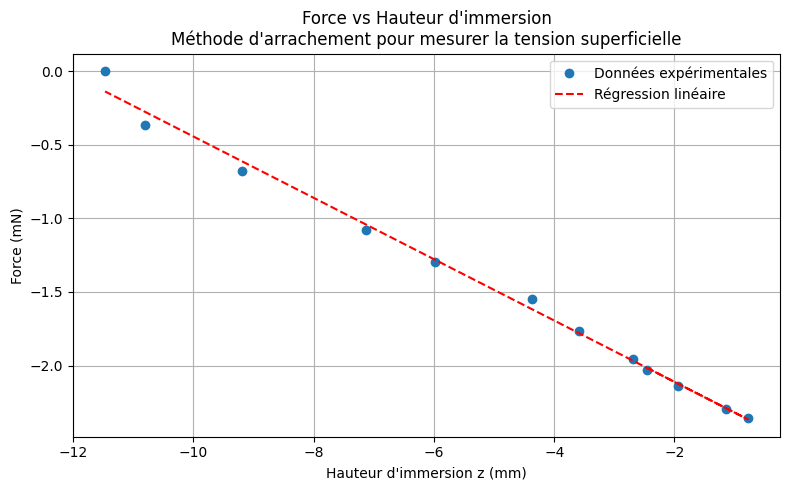

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ----------------------------
# definition des constantes
# ----------------------------
g = 9.81  # m/s²
rho_alchool = 789.0  # kg/m³
tension_superficielle_alcool = 0.022  # N/m (référence)

# Dimensions du cylindre
D_ext = 15.06e-3  # diamètre extérieur (m)
D_int = 13.94e-3  # diamètre intérieur (m)

# Calcul du périmètre
perimetre = np.pi * (D_ext + D_int)

# ----------------------------
# Lecture des données
# ----------------------------
# Assurez-vous que le fichier CSV est dans le même répertoire que ce script
df = pd.read_csv('balance_arra.csv', header=None, names=['z_mm', 'mass_g'])

# Conversion des unités
df['z_m'] = df['z_mm'] / 1000
df['force_N'] = df['mass_g'] / 1000 * g  # F = m g
df['force_mn'] = df['force_N'] * 1000  # Conversion en mN

# ----------------------------
# Régression linéaire
# ----------------------------
X = df[['z_m']].values
y = df['force_N'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_  # ordonnée à l'origine

# ----------------------------
# Calcul de la tension superficielle
# ----------------------------
gamma_exp = intercept / perimetre

# ----------------------------
# Calcul de la tension superficielle
# ----------------------------
print(f"Pente (slope): {slope:.4f} N/m")
print(f"Ordonnée à l'origine (intercept): {intercept:.6f} N")
print(f"Surface tension mesurée (γ): {gamma_exp:.5f} N/m")
print(f"Tension superficielle d'alcool (référence): {tension_superficielle_alcool:.5f} N/m")

# ----------------------------
# 绘图
# ----------------------------
plt.figure(figsize=(8, 5))
plt.plot(df['z_mm'], df['force_mn'], 'o', label='Données expérimentales')
plt.plot(df['z_mm'], model.predict(X)* 1000, 'r--', label='Régression linéaire')
plt.xlabel("Hauteur d'immersion z (mm)")
plt.ylabel("Force (mN)")
plt.title("Force vs Hauteur d'immersion\nMéthode d'arrachement pour mesurer la tension superficielle")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Loi Jorin

On utilise  Série de capillaires ("chandelier") pour étude de la loi de Jurin

Dans la theorie, nous avons la relation entre l'hauteur et la diametre:

$$
h=\frac{2 \gamma \cos \theta}{\rho g r}
$$

Considerant que, la tube est totallement rince, $\cos \theta = 1$, nou avonas donc:

$$
h=\frac{2 \gamma}{\rho g r}=\frac{4 \gamma}{\rho g d}
$$

Nous puissons faire les analyse suivant avec les resultats des mesures et code.

In [3]:
g = 9.81  # m/s²

# -----------------------
# 读取并处理数据
# -----------------------
df = pd.read_csv('jorin-alchool.csv', header=None, names=['diameter_mm', 'height_cm'])

# 单位转换
df['diameter_m'] = df['diameter_mm'] / 1000
df['height_m'] = df['height_cm'] / 100

# 创建 1/d 变量
df['inv_diameter'] = 1 / df['diameter_m']

# -----------------------
# 回归分析：h = C / d  → h vs 1/d 拟合
# -----------------------
X = df[['inv_diameter']].values
y = df['height_m'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

# -----------------------
# 计算理论斜率
# h = 4γ / (ρ g d) → C = 4γ / (ρ g)
C_theory = 4 * tension_superficielle_alcool / (rho_alchool * g)


In [4]:
# 由实验斜率反推出表面张力
gamma_exp = (slope * rho_alchool * g) / 4

print(f"\n拟合结果（实验）：")
print(f"斜率 C_exp = {slope:.6e} m²")
print(f"→ 由拟合斜率反推表面张力 γ_exp = {gamma_exp:.5f} N/m")
print(f"文献表面张力 γ_ref = {tension_superficielle_alcool:.5f} N/m")

error_percent = abs(gamma_exp - tension_superficielle_alcool) / tension_superficielle_alcool * 100
print(f"相对误差 = {error_percent:.2f} %")



拟合结果（实验）：
斜率 C_exp = 1.143589e-05 m²
→ 由拟合斜率反推表面张力 γ_exp = 0.02213 N/m
文献表面张力 γ_ref = 0.02200 N/m
相对误差 = 0.59 %


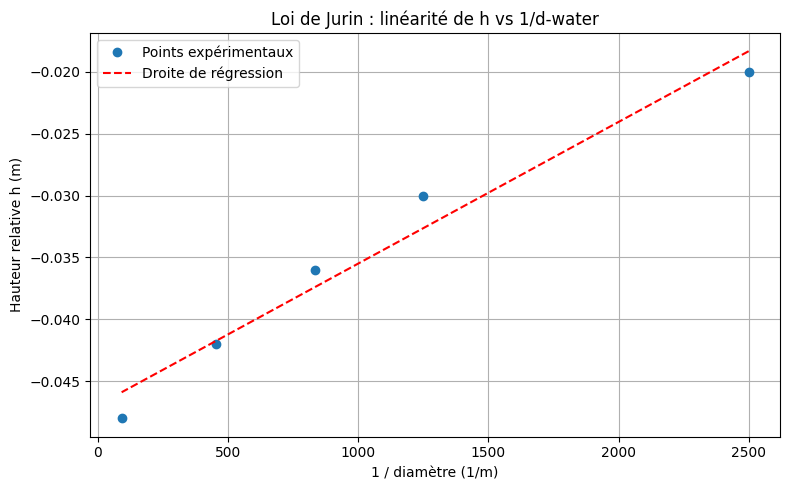

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(df['inv_diameter'], df['height_m'], 'o', label='Points expérimentaux')
plt.plot(df['inv_diameter'], model.predict(X), 'r--', label='Droite de régression')
plt.xlabel("1 / diamètre (1/m)")
plt.ylabel("Hauteur relative h (m)")
plt.title("Loi de Jurin : linéarité de h vs 1/d-water")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Ecoulement



### Loi de Poisueill

utilize une document .csv pour note les resultats.

example:
```
1.0
0.8
0.5
0.3
......
```

In [11]:
tube_spacing_m = 12.8e-2 # 12.8cm
tube_diametre = 4.93e-3 #4.93mm


flow_rate_lpm = 0.812
# volume flow rate (Litre/minute) → flow rate (m³/s)
flow_rate_m3_s = (flow_rate_lpm / 1000) / 60


# read data
poisueill_data = pd.read_csv('conduit-1mesure.csv', header=None, names=['height_cm'])
# transvers l'attitude a difference de pression
poisueill_data['pressure_Pa'] = rho_water * g * (poisueill_data['height_cm'] / 100)
# Transvers l'attitude a difference de pression
poisueill_data['height_diff_cm'] = poisueill_data['height_cm'].diff()
poisueill_data['pressure_diff_Pa'] = poisueill_data['pressure_Pa'].diff()
# Distance entre les tubes verticaux en METTRE

poisueill_data['pressure_gradient_Pa_per_m'] = poisueill_data['pressure_diff_Pa'] / tube_spacing_m


# output
print("Poisueill experiment: Hateur dans les tube verticaux et pertes de charges：")
print(poisueill_data)
print(f"Flow：{flow_rate_m3_s:.6f} m³/s")

Poisueill experiment: Hateur dans les tube verticaux et pertes de charges：
   height_cm  pressure_Pa  height_diff_cm  pressure_diff_Pa  \
0       24.5   2398.64310             NaN               NaN   
1       22.5   2202.83550            -2.0        -195.80760   
2       20.5   2007.02790            -2.0        -195.80760   
3       17.5   1713.31650            -3.0        -293.71140   
4       15.5   1517.50890            -2.0        -195.80760   
5       13.4   1311.91092            -2.1        -205.59798   
6       11.6   1135.68408            -1.8        -176.22684   

   pressure_gradient_Pa_per_m  
0                         NaN  
1                -1529.746875  
2                -1529.746875  
3                -2294.620312  
4                -1529.746875  
5                -1606.234219  
6                -1376.772188  
Flow：0.000014 m³/s


In [12]:
# 1. Calculate the cross-sectional area of the pipe (assuming circular pipe)
cross_section_area = math.pi * (tube_diametre ** 2) / 4

# 2. calculer la vitesse/velocite moyenne du fluide
velocity = flow_rate_m3_s / cross_section_area

# 3. nombre Reynolds Re = (rho * v * D) / mu
Re = (rho_water * velocity * tube_diametre) / viscosite_dynamique_eau

# 输出计算结果
print(f"\n vitesse moyenne: {velocity:.6f} m/s")
print(f"Reynolds number: {Re:.1f}")




 vitesse moyenne: 0.708959 m/s
Reynolds number: 3481.2



resultat agression linear：
diff pression: slope：-1700.20 Pa/m
pression inicial：2409.74 Pa


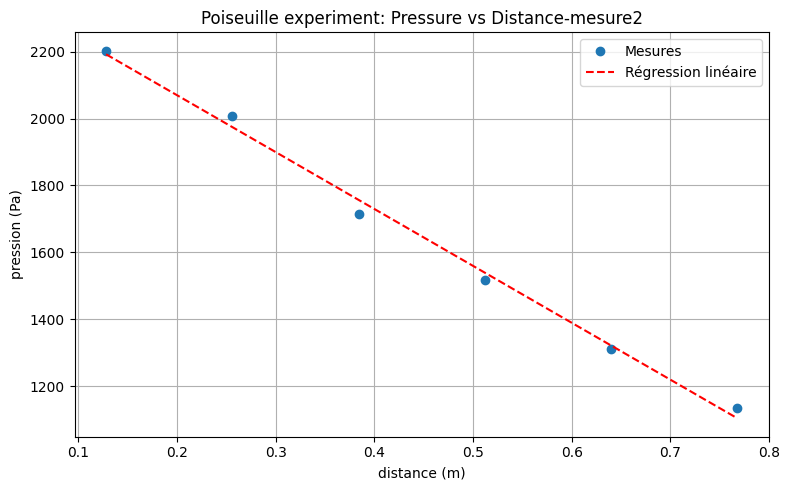

In [8]:
from sklearn.linear_model import LinearRegression

# -------------------------------------
# 添加测量点位置：假设每个点间距为 tube_spacing_m
# -------------------------------------
poisueill_data['distance_m'] = poisueill_data.index * tube_spacing_m

# 去掉第一个 NaN 差值行（由 diff 产生）
poisueill_data = poisueill_data.dropna()

# 线性拟合压力 vs 距离
X = poisueill_data[['distance_m']].values
y = poisueill_data['pressure_Pa'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]      # 应为负值（表示压降）
intercept = model.intercept_

print(f"\nresultat agression linear：")
print(f"diff pression: slope：{slope:.2f} Pa/m")
print(f"pression inicial：{intercept:.2f} Pa")

# 可视化
plt.figure(figsize=(8, 5))
plt.plot(poisueill_data['distance_m'], poisueill_data['pressure_Pa'], 'o', label='Mesures')
plt.plot(poisueill_data['distance_m'], model.predict(X), 'r--', label='Régression linéaire')
plt.xlabel("distance (m)")
plt.ylabel("pression (Pa)")
plt.title("Poiseuille experiment: Pressure vs Distance-mesure2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Seuil en V



Nous étudions principalement la relation entre le débit et la hauteur d'eau. Nous avons noté que la partie supérieure de l'encoche en V est à 22.0 et la partie inférieure à 14.5.

Nous prenons 14.5 comme plan de référence.

forme .CSV

`frequence altitude`

`130, 18.1`

`120, 18.0`

`...etc ...`



nous avons le valeur en theorie: (cf: poly Théorie Ecoulement canal v9_1)

$$
Q(h)=\frac{8 \sqrt{2}}{15} \sqrt{g} \tan (\alpha) \cdot h^{5 / 2}
$$

d'ou

Q : débit  theorique

h: hauteur relative, 

$\theta$: angle de la lame mince, par mesure 0.583 rad, soit $\alpha$ = 0.219rad

    frequency_Hz  altitude_cm  h_cm    h_m  Q_exp_m3s  Q_th_m3s
0          130.0         18.1   3.6  0.036   0.000173  0.000129
1          134.0         18.2   3.7  0.037   0.000179  0.000138
2          121.0         18.0   3.5  0.035   0.000161  0.000120
3          108.0         17.8   3.3  0.033   0.000144  0.000104
4           99.0         17.5   3.0  0.030   0.000132  0.000082
5           81.0         17.4   2.9  0.029   0.000108  0.000075
6           68.9         17.0   2.5  0.025   0.000092  0.000052
7           55.0         16.7   2.2  0.022   0.000073  0.000038
8           44.0         16.4   1.9  0.019   0.000059  0.000026
9           34.0         16.2   1.7  0.017   0.000045  0.000020
10          27.0         16.0   1.5  0.015   0.000036  0.000014


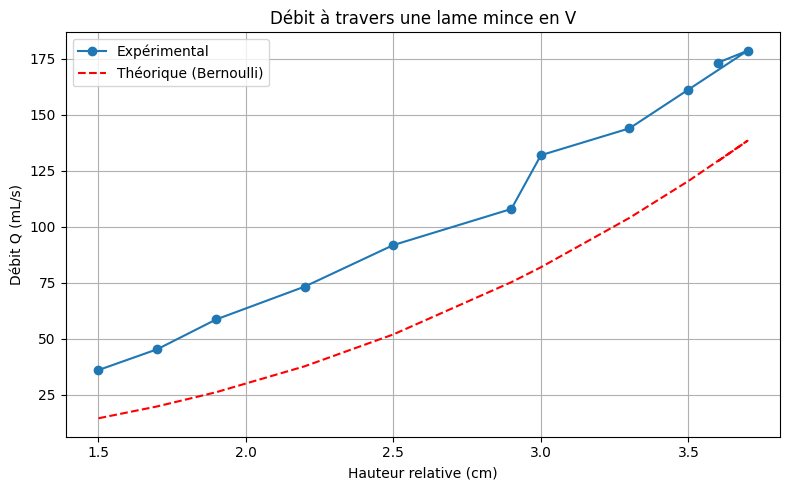

In [16]:

# 常数定义
g = 9.81  # m/s²
alpha = 0.219 # demi angle de la lame en V (radians)
tan_alpha = np.tan(alpha)

# 转换因子：750Hz = 1L/min = 1/60 * 1e-3 m³/s
frequency_to_flow = 1.0 / 750 * 1e-3  # m³/s per Hz

# 读取CSV数据，格式为 'frequence altitude'
data = pd.read_csv('seuil-v.csv', names=['frequency_Hz', 'altitude_cm'])

# 基准高度（V型缺口底部）为14.5cm
base_height_cm = 14.5
data['h_cm'] = data['altitude_cm'] - base_height_cm
data = data[data['h_cm'] > 0]  # 去除负值

# 单位转换：cm → m
data['h_m'] = data['h_cm'] / 100

# 实验流量（根据频率）
data['Q_exp_m3s'] = data['frequency_Hz'] * frequency_to_flow

# debit Q = (8√2/15) * √g * tan(α) * h^{5/2}
k = (8 * np.sqrt(2) / 15) * np.sqrt(g) * tan_alpha
data['Q_th_m3s'] = k * data['h_m'] ** (2.5)

# 显示处理后的数据
print(data)

# -----------------------
# 绘图：流量 vs 高度
# -----------------------
plt.figure(figsize=(8, 5))
plt.plot(data['h_cm'], data['Q_exp_m3s']*1e6, 'o-', label='Expérimental')
plt.plot(data['h_cm'], data['Q_th_m3s']*1e6, 'r--', label='Théorique (Bernoulli)')
plt.xlabel("Hauteur relative (cm)")
plt.ylabel("Débit Q (mL/s)")
plt.title("Débit à travers une lame mince en V")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


analyse d'erreur avec methode MSE



In [ ]:
from sklearn.metrics import mean_squared_error

# ---------------------
# MSE calcul
# ---------------------
mse = mean_squared_error(data['Q_exp_m3s'], data['Q_th_m3s'])
print(f"\nMSE (Q_exp vs Q_th) = {mse:.2e} (m³/s)²")

# 如果你想让它更直观一点，比如以 mL²/s² 显示：
mse_ml2 = mse * 1e12  # (mL/s)^2
print(f"MSE = {mse_ml2:.2f} (mL/s)²")



MSE (Q_exp vs Q_th) = 1.40e-09 (m³/s)²
MSE = 1402.27 (mL/s)²


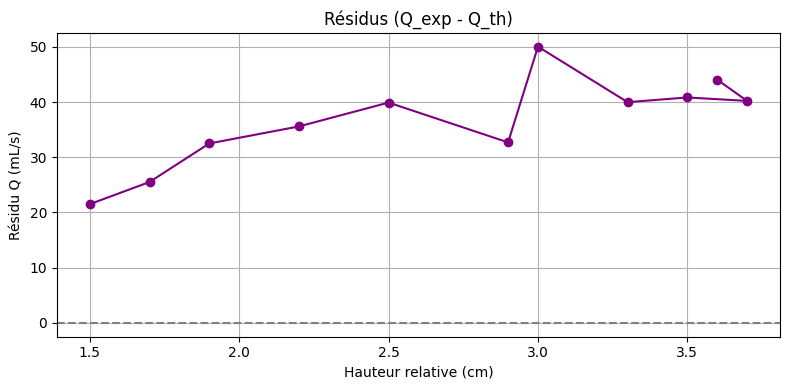

In [18]:

data['residuals'] = data['Q_exp_m3s'] - data['Q_th_m3s']

plt.figure(figsize=(8, 4))
plt.plot(data['h_cm'], data['residuals'] * 1e6, 'o-', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Hauteur relative (cm)")
plt.ylabel("Résidu Q (mL/s)")
plt.title("Résidus (Q_exp - Q_th)")
plt.grid(True)
plt.tight_layout()
plt.show()
